# Исследование стартапов

- Автор: Владимир Добров
- Дата: 2025-05-07

## Введение

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, провести исследование на исторических данных.
Необходимо подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


### Описание данных  

#### Таблица `acquisition`
Содержит информацию о покупках одними компаниями других компаний:  
- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.  

#### Таблица `company_and_rounds`  
Содержит информацию о компаниях и раундах финансирования:
- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.  

#### Таблица `education`  
Содержит информацию об образовании сотрудника:
- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.  

#### Таблица `people`  
Содержит информацию о сотрудниках:
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.  

#### Таблица `degrees`  
Содержит информацию о типе образования сотрудника:
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.  

Дополнительные таблицы:  

- fund.csv
- investment.csv  

#### Таблица` fund`  
Содержит информацию о фондах:
- id — идентификатор фонда.
- name — название фонда.
- category_code — категория области деятельности компании.
- founded_at — дата создания фонда.
- domain — сайт фонда.
- network_username — ник фонда в сети.
- country_code — код страны фонда.
- investment_rounds — число инвестиционных раундов.
- invested_companies — число профинансированных компаний.
- milestones — вехи финансирования.  

#### Таблица `investment`  
Содержит информацию о раундах инвестирования:
- id — идентификатор этапа инвестирования.
- funding_round_id — идентификатор раунда инвестирования.
- company_id — индентификатор компании.
- funding_round_type — тип финансирования.
- fund_id — идентификатор фонда.



### 1.1. Вывод общей информации, исправление названия столбцов


In [ ]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим все данные по проекту

In [2]:
# Выгружаем данные в переменные rests_df и prices_df
PATH = "https://code.s3.yandex.net/datasets/"
acquis_df = pd.read_csv(PATH + 'acquisition.csv')
company_df = pd.read_csv(PATH + 'company_and_rounds.csv')
people_df = pd.read_csv(PATH + 'people.csv')
education_df = pd.read_csv(PATH + 'education.csv')
degrees_df = pd.read_csv(PATH + 'degrees.csv')
fund = pd.read_csv(PATH + 'fund.csv')
investment = pd.read_csv(PATH + 'investment.csv')

Проверим названия столбцов.

In [3]:
# Определяем список таблиц
dfs =['acquis_df', 'company_df', 'people_df', 'education_df', 'degrees_df']

# Выводим названия столбцов таблиц
for df in dfs:
    print(df)
    print(f'{list(locals()[df])} \n')

acquis_df
['id', 'acquiring_company_id', 'acquired_company_id', 'term_code', 'price_amount', 'acquired_at'] 

company_df
['company  ID', 'name', 'category  code', 'status', 'founded  at', 'closed  at', 'domain', 'network  username', 'country  code', 'investment  rounds', 'funding  rounds', 'funding  total', 'milestones', 'funding  round  id', 'company  id', 'funded  at', 'funding  round  type', 'raised  amount', 'pre  money  valuation', 'participants', 'is  first  round', 'is  last  round'] 

people_df
['id', 'first_name', 'last_name', 'company_id', 'network_username'] 

education_df
['id', 'person_id', 'instituition', 'graduated_at'] 

degrees_df
['id', 'object_id', 'degree_type', 'subject'] 



In [4]:
# Приводим названия столбцов к виду snake_case
company_df.columns = company_df.columns.str.replace('  ', '_')


# Изменим повторяющиеся название колонки `company_id` на `companyid`
company_df = company_df.rename(columns={'company_id': 'companyid'})

# Приводим названия колонок к нижнему регистру
company_df.columns = company_df.columns.str.lower()

# Проверим результат
company_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'companyid', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [5]:
# Выводим информацию о датафрейме и первые строки датафрейма на экран
for df in dfs:
    print(df)
    print()
    df = locals()[df] 
    df.info()
    display(df.head(10))

acquis_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01
5,11,227,228,NaN,7140000,2003-08-05
6,12,5,230,cash,0,2007-07-01
7,14,318,314,cash,0,2006-10-01
8,15,20,333,stock,1500000000,2002-07-08
9,16,342,341,cash,350000000,2007-08-01


company_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  companyid            52928 non-null   float64
 15  funde

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,companyid,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaN,mywebbo.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaN,synergie-media.com,NaN,MAR,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaN,NaN,NaN,IND,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaN,NaN,hostnine.com,Hostnine,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


people_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN
6,100006,Courtney,Homer,81558.0,jobsbostontech
7,100009,Eddy,Badrina,NaN,NaN
8,100010,Michael,Dadashyan,NaN,fbroulette
9,100011,Jeff,Grell,NaN,NaN


education_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN
5,6,1017,Northeastern University,1988-01-01
6,7,6176,Rochester Institute of Technology,2002-01-01
7,8,5412,University of Cambridge,2002-01-01
8,9,1243,University of Oregon,1997-01-01
9,10,6265,University of Pennsylvania,1989-01-01


degrees_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
5,6,p:1017,BS,Computer Science
6,7,p:6176,BS,Computer Science
7,8,p:5412,MS,Politics
8,9,p:1243,BA,International Business & Marketing
9,10,p:6265,BS,Economics


In [6]:
!pip install matplotlib-venn

     |████████████████████████████████| 40 kB 2.5 MB/s eta 0:00:011
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45389 sha256=e744958cc8073a520d30e1138bc1457ae8229e3095789b01f4053875731a8cc5
  Stored in directory: /home/jovyan/.cache/pip/wheels/86/29/d8/0f3c5a37c967a34fb40aaabd414f92104d2ad5fb149c0114a1
Successfully built matplotlib-venn


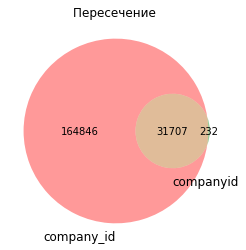

In [7]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

first_id = set(company_df['company_id'].dropna().unique())
second_id = set(company_df['companyid'].dropna().unique())

# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company_id', 'companyid'))

# Отображаем график
plt.title("Пересечение ")
plt.show() 

- В датасетах обнаружены поля содержащие дату c тип данных 'object' которые были изменены на 'datetime'
- два поля в датасете при приведении имен колонок к виду snack_case имеют одинаковое название 'company_df'. Было изменено название одного из полей на 'companyid'. Также видно, что поле 'company_id' не имеет пропусков в отличае от 'companyid' с 76% пропусков 

### 1.2. Смена типов и анализ пропусков


Обработаем типы данных в столбцах, которые хранят значения даты и времени

In [8]:
# Приводим данные с датой и временем к типу datetime64[ns]
acquis_df['acquired_at'] = acquis_df['acquired_at'].astype('datetime64[ns]')

# Проверим результат
acquis_df.info()
# acquis_df['acquired_at'].dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [9]:
# Приводим данные с датой и временем к типу datetime64[ns]
column_date = ['founded_at', 'closed_at', 'funded_at']
for column in column_date:
    company_df[column] = company_df[column].astype('datetime64[ns]') 

# Проверим результат
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [10]:
# Функция для обработки столбца, преобразует столбцы с '_at' в datetime
def process_to_datetime(column):
     if '_at' in column.name:  # Проверяем, содержит ли название столбца '_at'
        return pd.to_datetime(column)  # Преобразуем в datetime
     return column  # Возвращаем столбец без изменений

# Основная функция для обработки датасетов
def process_datasets(dataset_dict, column_processor):
    """
    Функция, которая проходит по каждому датасету в словаре и каждому столбцу,
    применяя к ним функцию column_processor.
    """
    for dataset_name, dataset in dataset_dict.items():  # Проходим по каждому датасету в словаре
        for column_name in dataset.columns:  # Проходим по каждому столбцу
            dataset[column_name] = column_processor(dataset[column_name])  # Применяем функцию
    return dataset_dict
  
# Словарь датасетов
dataset_dict = {
    'acquis_df': acquis_df,
    'company_df': company_df,
    'people_df': people_df,
    'education_df': education_df,
    'degrees_df': degrees_df
}

# Обрабатываем датасеты
processed_datasets = process_datasets(dataset_dict, process_to_datetime)

# Выводим результат
for dataset_name, dataset in processed_datasets.items():
    display(f"Датасет '{dataset_name}':")
    display(dataset)

"Датасет 'acquis_df':"

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01
...,...,...,...,...,...,...
9402,10525,267859,285995,stock,222000000,2013-12-11
9403,10526,285493,286006,NaN,0,2013-12-09
9404,10527,223792,220208,NaN,26000000000,2007-07-03
9405,10528,227620,286176,cash,52400000,2013-12-12


"Датасет 'company_df':"

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,companyid,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


"Датасет 'people_df':"

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
...,...,...,...,...,...
226704,99999,Ramon,Peypoch,NaN,NaN
226705,174088,Dr. Ray,Woods,188200.0,network
226706,118386,Ricardo,Durand,143419.0,itechsocialnet
226707,175827,mahesh,kumar,NaN,socialnethubs


"Датасет 'education_df':"

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaT
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaT
...,...,...,...,...
109605,109606,268589,American Institute of Certtified Public Accoun...,NaT
109606,109607,268527,South China University of Technology,NaT
109607,109608,268527,Clarkson University,NaT
109608,109609,268528,Colorado State University,NaT


"Датасет 'degrees_df':"

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
...,...,...,...,...
109605,109606,p:268589,CPA,NaN
109606,109607,p:268527,MS & BS,Engineering
109607,109608,p:268527,PhD,Engineering
109608,109609,p:268528,B.S.,Electrical Engineering


Оценим полноту данных

In [11]:
# Посчитаем абсолютное количество процент строк с пропусками в каждом столбце
for df in dfs:  
    print(df)
    print()
    print(f'    Доля пропусков %:')
    print(round(locals()[df].isna().mean() * 100))
    print()

acquis_df

    Доля пропусков %:
id                       0.0
acquiring_company_id     0.0
acquired_company_id      0.0
term_code               81.0
price_amount             0.0
acquired_at              0.0
dtype: float64

company_df

    Доля пропусков %:
company_id              0.0
name                    0.0
category_code          34.0
status                  0.0
founded_at             50.0
closed_at              98.0
domain                 32.0
network_username       56.0
country_code           50.0
investment_rounds       0.0
funding_rounds          0.0
funding_total           0.0
milestones              0.0
funding_round_id       76.0
companyid              76.0
funded_at              76.0
funding_round_type     76.0
raised_amount          76.0
pre_money_valuation    76.0
participants           76.0
is_first_round         76.0
is_last_round          76.0
dtype: float64

people_df

    Доля пропусков %:
id                   0.0
first_name           0.0
last_name            0.0
com

In [12]:
!pip install missingno

<AxesSubplot:>

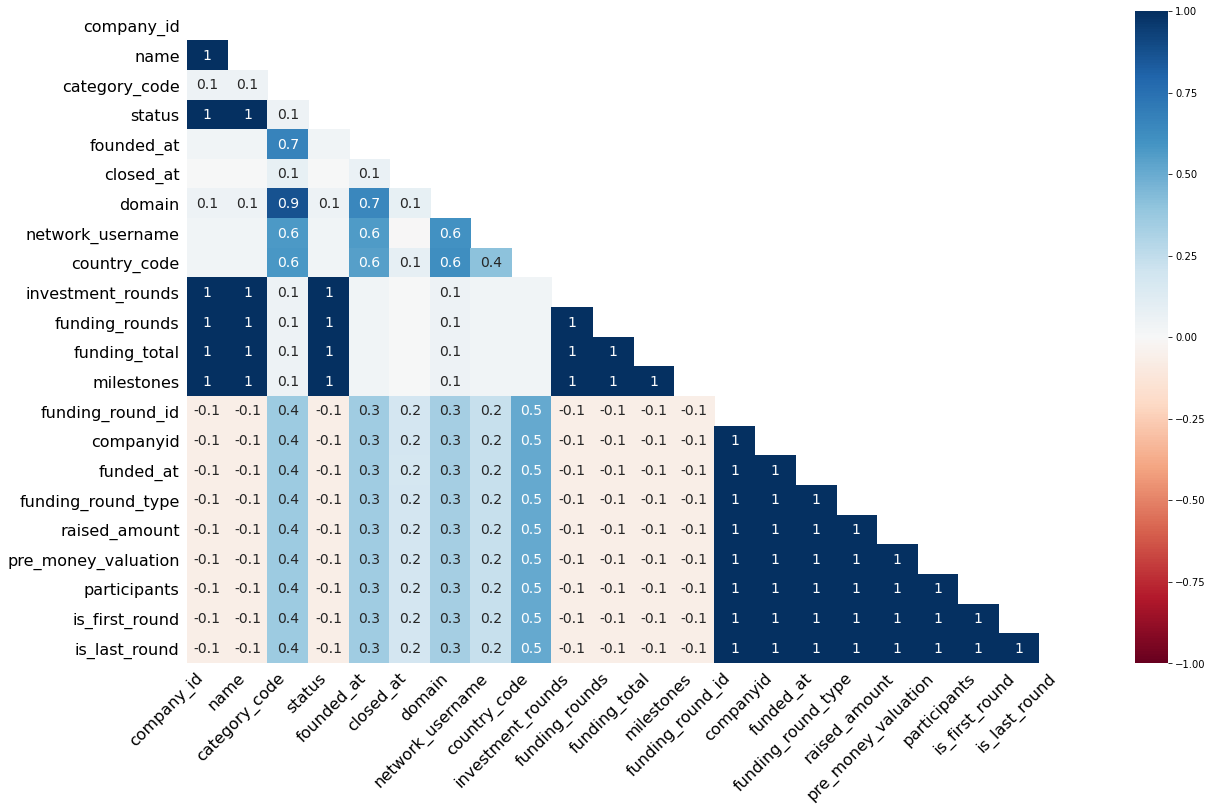

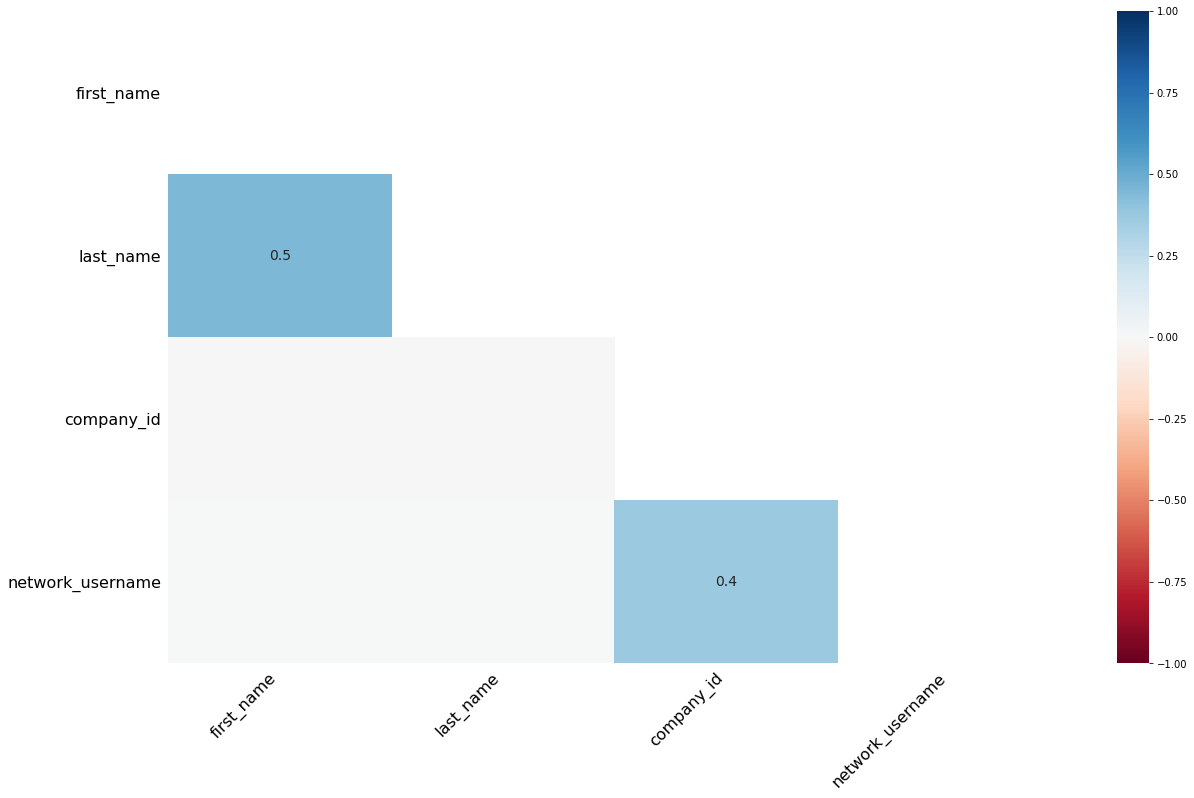

In [13]:
import missingno as msno

msno.heatmap(company_df)
msno.heatmap(people_df)

Первичноый анализ полноты данных показывает, что данные невысокого качества — присутствует существенное количество свыще 50% пропущенных значений по части информациию. 76% пропущенных данных о фининсаровании и более 80% пропусков в данных связывающих информацию о сотрудниках с компаниями (company_id). Данных для корректного анализа не достаточно.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам



 Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:  
    - типичный размер средств, выделяемый в рамках одного раунда;  
    - общее количество раундов финансирования за этот год.

In [14]:
# Добавим столбец с указанием года
company_df['year'] = company_df['funded_at'].dt.year.astype(pd.Int16Dtype())

table = pd.pivot_table(company_df, 
               values=['raised_amount'],
               index=['year'],
               aggfunc=['count', 'median'])

# Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования
table = table.query('year > 1998')
table

,count,median
,raised_amount,raised_amount
year,,
1999,76,2000000.0
2000,125,4200000.0
2001,96,3000000.0
2002,116,4200000.0
2003,159,3000000.0
2004,291,5000000.0
2005,1633,5500000.0
2006,2436,5000000.0


Построим график, отражающий динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования

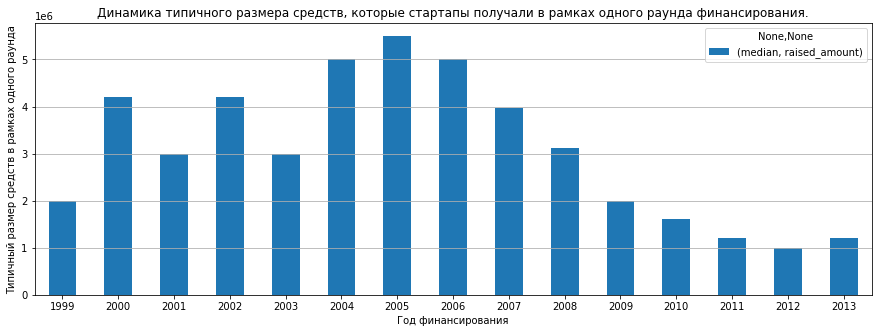

In [15]:
# Строим столбчатую диаграмму
table.plot(
           y = ('median', 'raised_amount'),
           figsize=(15, 5),
           kind='bar', 
           rot=0, 
           legend=True, 
           title=f'Динамика типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.'
)

# Настраиваем оформление графика
plt.xlabel('Год финансирования')
plt.ylabel('Типичный размер средств в рамках одного раунда')

# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

На основе полученных данных можно сделать следующие выводы:
- В 2005 году типичный размер собранных в рамках одного раунда средств был максимален
- В 2013 году наблюдается тенденуия к высокому значение количеству раундов с выделениеме в рамках каждого раунда незначительных средств
- Можно так охарактеризовать тенденции:  Очень много стало мелких стартапов, которые активно финансируется,  вот поэтому с одной стороны рост раундов, и рост суммарных инвестиций, а с другой стороны снижение   raised_amount. Это две стороны одной монеты


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оценим, насколько информация об образовании сотрудников полна. Разделим все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп.

In [ ]:
#Группитуем таблицу education_df по идентификатору работника
education_df_gr = education_df.groupby(['person_id'])['instituition'].count().reset_index()

# Объединяем таблицы people_df и education_df_gr
df_merge = people_df.merge(education_df_gr, left_on='id', right_on='person_id', how='left')

# Группируем полученную таблицу по идентификатору компании
df_merge_gr = df_merge.groupby(['company_id']).agg(count_person_id=('person_id','count'), count_id=('id', 'count'))\
                                              .sort_values(by='count_id').reset_index()

# Разделим все компании на несколько групп по количеству сотрудников добавив поле 'staf_group'
bins   = [0, 1, 2, 3, 5, 10, 25, float('inf')]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']
df_merge_gr['staf_group'] = pd.cut(df_merge_gr['count_id'], bins=bins, labels=labels)

# Сгруппируем полученную таблицу по полю 'staf_group' 
df_merge_gr = df_merge_gr.groupby('staf_group').agg({'count_person_id': 'sum', 'count_id': 'sum'}).round().reset_index()

# Определим среднюю долю сотрудников без информации об образовании в каждой из групп
df_merge_gr['share_no_edication'] = round(1 - df_merge_gr['count_person_id']/df_merge_gr['count_id'], 2)

print(f'Cредняя доля сотрудников без информации об образовании')
display(df_merge_gr)

Cредняя доля сотрудников без информации об образовании


,staf_group,count_person_id,count_id,share_no_edication
0,1,9736,18117,0.46
1,2,2893,5418,0.47
2,3,1418,2763,0.49
3,4-5,1495,2985,0.50
4,6-10,1242,2664,0.53
5,11-25,775,1425,0.46
6,26+,905,1243,0.27


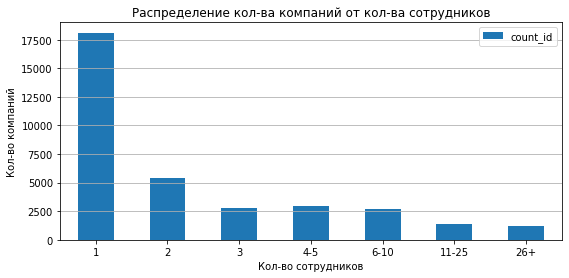

In [41]:
df_merge_gr.plot(  x = 'staf_group',
                   y = 'count_id',
                   figsize=(9, 4),
                   kind='bar', 
                   rot=0, 
                   legend=True, 
                   title=f'Распределение кол-ва компаний от кол-ва сотрудников',
                   xlabel='Кол-во сотрудников',
                   ylabel='Кол-во компаний'
)

# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

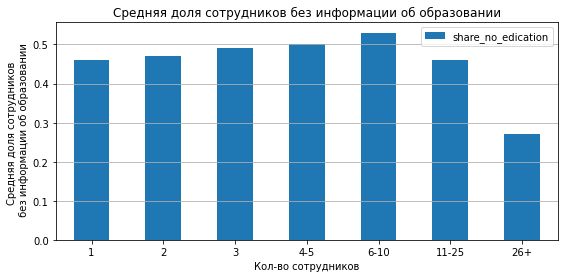

In [17]:
# Строим столбчатую диаграмму
df_merge_gr.plot(  x = 'staf_group',
                   y = 'share_no_edication',
                   figsize=(9, 4),
                   kind='bar', 
                   rot=0, 
                   legend=True, 
                   title=f'Cредняя доля сотрудников без информации об образовании'
)

# Настраиваем оформление графика
plt.xlabel('Кол-во сотрудников')
plt.ylabel('Cредняя доля сотрудников \n без информации об образовании')

# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()


- Нет необходимости присоеденять таблицу 'degrees.csv' к объединенному датасету, т.к. информацию о наличии образовании уже получена из 'edication_df'

In [18]:
# Убираем символы 'р:' из поля 'object_id' и меняем тип с object на integer
degrees_df['object_id'] = degrees_df['object_id'].str.strip('p:').astype('int64')

# Добавляем поле 'no_edication' принимающе значение True в случае отсутствия данных об образовании в колонках 'degree_type' и 'subject'
degrees_df['no_edication'] = degrees_df['degree_type'].isna() | degrees_df['subject'].isna()

# Группируем по 'object_id'
degrees_df_gr = degrees_df.groupby(['object_id', 'no_edication'])['subject'].count().sort_values().reset_index()

# Присоеденяем gr_degrees к people_df
df_merge_degrees = df_merge.merge(degrees_df_gr, left_on='id', right_on='object_id', how='left')
df_merge_degrees

,id,first_name,last_name,company_id,network_username,person_id,instituition,object_id,no_edication,subject
0,10,Mark,Zuckerberg,5.0,NaN,10.0,1.0,10.0,True,1.0
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
236135,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236136,174088,Dr. Ray,Woods,188200.0,network,174088.0,1.0,174088.0,False,1.0
236137,118386,Ricardo,Durand,143419.0,itechsocialnet,118386.0,1.0,118386.0,False,1.0
236138,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaN,NaN


### 2.3. Объединять или не объединять — вот в чём вопрос



Рассмотрим качество и количество данных поля `network_username` присутствующих в датасетах `company_df` и `people_df`

In [19]:
print('    company_df')
display(company_df['network_username'])
print('Кол-во пропусков данныз:')
display(company_df['network_username'].isna().sum())
print('Кол-во уникальных значений:')
display(company_df['network_username'].nunique())
print('Кол-во дублирующихся значений:')
company_df['network_username'].duplicated().sum()

    company_df


0         BachelrWetpaint
1         BachelrWetpaint
2         BachelrWetpaint
3                     NaN
4                     NaN
               ...       
217769                NaN
217770                NaN
217771                NaN
217772                NaN
217773                NaN
Name: network_username, Length: 217774, dtype: object

Кол-во пропусков данныз:


122240

Кол-во уникальных значений:


79571

Кол-во дублирующихся значений:


138202

In [20]:
print('    people_df')
display(people_df['network_username'])
print('Кол-во пропусков данныз:')
display(people_df['network_username'].isna().sum())
print('Кол-во уникальных значений:')
display(people_df['network_username'].nunique())
print('Кол-во дублирующихся значений:')
people_df['network_username'].duplicated().sum()

    people_df


0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
               ...      
226704               NaN
226705           network
226706    itechsocialnet
226707     socialnethubs
226708    esocialnetlike
Name: network_username, Length: 226709, dtype: object

Кол-во пропусков данныз:


187842

Кол-во уникальных значений:


38421

Кол-во дублирующихся значений:


188287

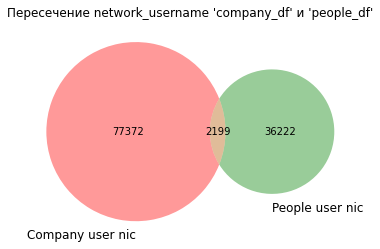

In [21]:
user_nic_1 = set(company_df['network_username'].dropna().unique())
user_nic_2 = set(people_df['network_username'].dropna().unique())

# Строим диаграмму Венна
venn2([user_nic_1, user_nic_2], set_labels=('Company user nic', 'People user nic'))

# Отображаем график
plt.title("Пересечение network_username 'company_df' и 'people_df'")
plt.show()  



- Данные о `network_username` в представленных датасетах часто дублируются. Присутствует значительное количество пропусков 56% в `company_df` и 83% в `people_df`. Данные можно использовать для объединения после группировки по данному полю и приведения к нижнему регистру.


### 2.4. Проблемный датасет и причина возникновения пропусков



Проанализируем значения и структуру датасета

In [22]:
# Отобразим все колонки датасета
print('company_df:')

pd.options.display.max_columns = None
display(company_df)

# Изучим пропуски в данных
print('Кол-во пропусков данных %:')
print(round(company_df.isna().mean()*100))


company_df:


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,companyid,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,2011
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,2011
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,2012
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,2013


Кол-во пропусков данных %:
company_id              0.0
name                    0.0
category_code          34.0
status                  0.0
founded_at             50.0
closed_at              98.0
domain                 32.0
network_username       56.0
country_code           50.0
investment_rounds       0.0
funding_rounds          0.0
funding_total           0.0
milestones              0.0
funding_round_id       76.0
companyid              76.0
funded_at              76.0
funding_round_type     76.0
raised_amount          76.0
pre_money_valuation    76.0
participants           76.0
is_first_round         76.0
is_last_round          76.0
year                   76.0
dtype: float64


Подготовим данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций

In [23]:
# Определяем список колонок для группировки значений
gr_column = ['company_id', 'name', 'category_code', 'status', 'domain', 'network_username', 'country_code',
             'investment_rounds', 'funding_rounds', 'funding_total', 'milestones', 'companyid'] 
# Список колонок для заполнения пропущенных значений
fillna_column = ['country_code', 'category_code', 'domain', 'network_username', 'company_id'] 

# Заполняем пропущенные значения 
gr_company_df = company_df
for column in fillna_column:
    gr_company_df[column] = gr_company_df[column].fillna(-1)

# Группируем таблицу по компаниям
gr_company_df = company_df.groupby(gr_column).agg(max_funded_at=('funded_at','max'),
                                                  max_founded_at=('founded_at', 'max'),
                                                  max_closed_at=('closed_at', 'max'),
                                                  sum_raised_amount=('raised_amount', 'sum'),
                                                  sum_pre_money_valuation=('pre_money_valuation', 'sum'),
                                                  max_participants=('participants', 'max'),
                                                  max_is_first_round=('is_first_round', 'max'),
                                                  max_is_last_round=('is_last_round', 'max'),
                                                  max_year=('year', 'max')
                                                  )\
                                              .reset_index()

gr_company_df

,company_id,name,category_code,status,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,companyid,max_funded_at,max_founded_at,max_closed_at,sum_raised_amount,sum_pre_money_valuation,max_participants,max_is_first_round,max_is_last_round,max_year
0,1.0,Wetpaint,web,operating,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,3.975000e+07,5.0,1.0,2008-05-19,2005-10-17,NaT,3.975000e+07,0.000000e+00,4.0,1.0,1.0,2008
1,4.0,Digg,news,acquired,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0,4.0,2011-07-12,2004-10-11,NaT,4.500000e+07,0.000000e+00,8.0,1.0,1.0,2011
2,5.0,Socialnet,social,ipo,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0,5.0,2011-01-21,2004-02-01,NaT,2.425700e+09,1.564000e+10,4.0,1.0,1.0,2011
3,7.0,Omnidrive,network_hosting,closed,omnidrive.com,Nomadesk,ISR,0.0,1.0,8.000000e+05,4.0,7.0,2006-12-01,2005-11-01,2008-09-15,8.000000e+05,0.000000e+00,4.0,1.0,1.0,2006
4,9.0,Geni,web,acquired,geni.com,geni,USA,0.0,3.0,1.650000e+07,4.0,9.0,2009-01-19,2006-06-01,NaT,1.650000e+07,1.085000e+08,2.0,1.0,1.0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31702,286183.0,Wedding Spot,web,operating,wedding-spot.com,weddingspot,USA,0.0,1.0,2.250000e+05,0.0,286183.0,2013-12-12,2013-05-01,NaT,2.250000e+05,0.000000e+00,3.0,1.0,1.0,2013
31703,286184.0,Seldar Pharma,biotech,operating,-1,-1,USA,0.0,1.0,1.299900e+07,0.0,286184.0,2013-12-11,NaT,NaT,1.299900e+07,0.000000e+00,0.0,1.0,1.0,2013
31704,286186.0,Micromidas,cleantech,operating,micromidas.com,-1,USA,0.0,1.0,2.156060e+06,0.0,286186.0,2010-04-07,NaT,NaT,2.156060e+06,0.000000e+00,0.0,1.0,1.0,2010
31705,286200.0,STWA,other,operating,stwa.com,-1,USA,0.0,1.0,1.588120e+06,0.0,286200.0,2010-02-05,1998-01-01,NaT,1.588120e+06,0.000000e+00,0.0,1.0,1.0,2010


In [24]:
# Проверяем кол-во уникальных компаний в исходном и сгруппированном датасете

print('Кол-во уникальных компаний в исходном датасете:')
display(company_df['company_id'].nunique())
print('Кол-во уникальных компаний в сгруппированном датасете')
gr_company_df['company_id'].count()

Кол-во уникальных компаний в исходном датасете:


196554

Кол-во уникальных компаний в сгруппированном датасете


31707

-----
- Разделим датасет `company_df` на два датасета `fund_df`, `investment_df` и удалим полные дубликаты

In [25]:
# Разделим датасет company_df на две таблицы
fund_df = company_df[['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']]

print('Кол-во дубликатов в fund_df:\n- в исходном датасете')
print(fund_df.duplicated().sum())

# Удалим полные дубликаты
fund_df = fund_df.drop_duplicates()

print('- после удаления дублей')
print(fund_df.duplicated().sum())


investment_df = company_df[['funding_round_id', 'companyid', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round', 'year']]

print('\nКол-во дубликатов в investment_df: \n- в исходном датасете')
print(investment_df.duplicated().sum())

# Удалим полные дубликаты
investment_df = investment_df.drop_duplicates()

print('- после удаления дублей')
print(investment_df.duplicated().sum())


Кол-во дубликатов в fund_df:
- в исходном датасете
21220
- после удаления дублей
0

Кол-во дубликатов в investment_df: 
- в исходном датасете
164845
- после удаления дублей
0



## Шаг 3. Исследовательский анализ объединённых таблиц




### 3.1. Объединение данных



In [26]:
# df = fund_df.merge(investment_df, left_on='company_id', right_on='companyid')
df = fund_df[(fund_df['funding_rounds'] > 0) | (fund_df['investment_rounds'] > 0) | (fund_df['status'] == 'acquired')]
# merge_df.columns#.duplicated().sum()

# Оставим необходимые для анализа столбцы
df = df[['company_id', 'name', 'category_code', 'status', 'founded_at', 'closed_at',
                     'investment_rounds', 'funding_rounds', 'funding_total']]
       
df

,company_id,name,category_code,status,founded_at,closed_at,investment_rounds,funding_rounds,funding_total
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,0.0,3.0,39750000.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,0.0,0.0,0.0
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,0.0,1.0,5000000.0
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
217458,1344.0,Vobile,web,operating,2005-01-01,NaT,0.0,1.0,10000000.0
217459,142181.0,Stop Being Watched,software,operating,2010-06-10,NaT,0.0,1.0,500000.0
217463,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,0.0,4.0,44000000.0
217467,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,0.0,1.0,1300000.0



### 3.2. Анализ выбросов



In [27]:
# Изучаем статистические показатели столбца funding_total
print('Статистические показатели столбца funding_total:')
# pd.set_option('display.float_format','{:,}'.format)
df['funding_total'].describe().astype('int')

Статистические показатели столбца funding_total:


count         40747
mean       10135609
std        56464359
min               0
25%               0
50%          600000
75%         5650650
max      5700000000
Name: funding_total, dtype: int64

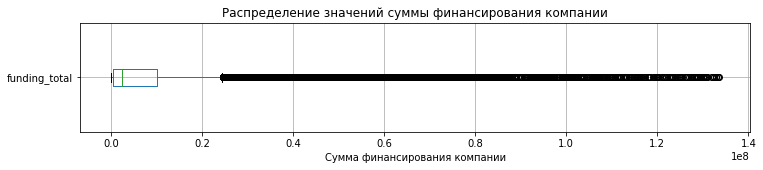

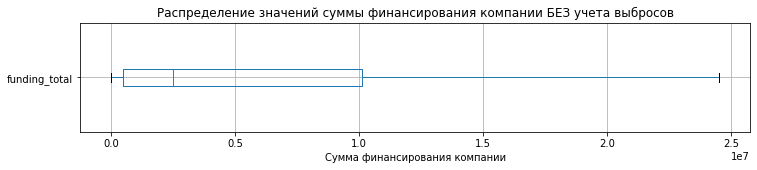

In [28]:
# Для визуализации уберём экстемальные выбросы 1% слева и справа
Q1 = df['funding_total'].quantile(0.01)
Q3 = df['funding_total'].quantile(0.99)

# Строим диаграмму размаха значений в столбце funding_total
df_quantile = df[(df['funding_total'] > Q1) & (df['funding_total'] < Q3)]
df_quantile.boxplot(column="funding_total",
                    figsize=(12, 2),
                    vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений суммы финансирования компании')
plt.xlabel('Сумма финансирования компании') 

# Выводим график
plt.show()

df_quantile.boxplot(column="funding_total",
                    figsize=(12, 2),
                    showfliers=False,
                    vert=False)
plt.title('Распределение значений суммы финансирования компании БЕЗ учета выбросов')
plt.xlabel('Сумма финансирования компании') 
plt.show()


- Распределение данных характеризуется широким разбросом и длинным «хвостом» в правой части гистограммы. Такие высокие значения можно отнести к выбросам
- Из графика видно, типичный размер общего финансирования для одной компании от 30000 до 420000 

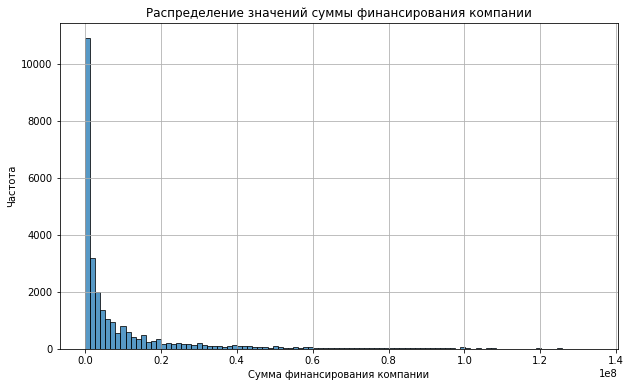

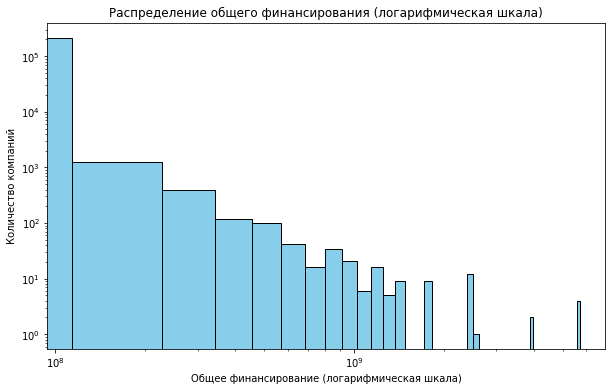

In [29]:
# Строим гистограмму 
df_quantile['funding_total'].plot(
                kind='hist', # гистограмма
                bins=100, # количество корзин
                figsize=(10, 6),
                alpha=0.75,
                edgecolor='black')


# Настраиваем оформление графика
plt.title('Распределение значений суммы финансирования компании')
plt.xlabel('Сумма финансирования компании')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

# Строим гистограмму с логарифмической шкалой
plt.figure(figsize=(10, 6))
plt.hist(company_df['funding_total'], bins=50, color='skyblue', edgecolor='black', log=True)
plt.xscale('log')  # Логарифмическая шкала по оси X
plt.xlabel('Общее финансирование (логарифмическая шкала)')
plt.ylabel('Количество компаний')
plt.title('Распределение общего финансирования (логарифмическая шкала)')
plt.show()



### 3.3. Куплены забесплатно?



Рассмотрим компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования

In [30]:
df_0 = df.merge(acquis_df, left_on='company_id', right_on='acquired_company_id', how='left')
df_0 = df_0[(df['funding_total']==0) & (df['status']=='acquired') & (df_0['price_amount'] < 2)].reset_index()

# Изучаем статистические показатели столбца funding_total
print('Статистические показатели столбца funding_total:')
df_0['funding_total'].describe().astype('int')

Статистические показатели столбца funding_total:


/tmp/ipykernel_48/1525952809.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_0 = df_0[(df['funding_total']==0) & (df['status']=='acquired') & (df_0['price_amount'] < 2)].reset_index()


count          240
mean       3851155
std       13669286
min              0
25%              0
50%              0
75%              0
max      158187000
Name: funding_total, dtype: int64

In [31]:
# Проверим дубли
# df_0[df_0.acquired_company_id.duplicated()==True].sort_values(by='acquired_company_id')
df_0[df_0.acquired_company_id == 7299]

,index,company_id,name,category_code,status,founded_at,closed_at,investment_rounds,funding_rounds,funding_total,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
218,37613,7299.0,Photobucket,web,acquired,2003-06-01,NaT,1.0,7.0,33672700.0,2713.0,7299.0,7299.0,NaN,0.0,2009-12-16
219,37614,7299.0,Photobucket,web,acquired,2003-06-01,NaT,1.0,7.0,33672700.0,8404.0,11.0,7299.0,NaN,0.0,2007-05-30


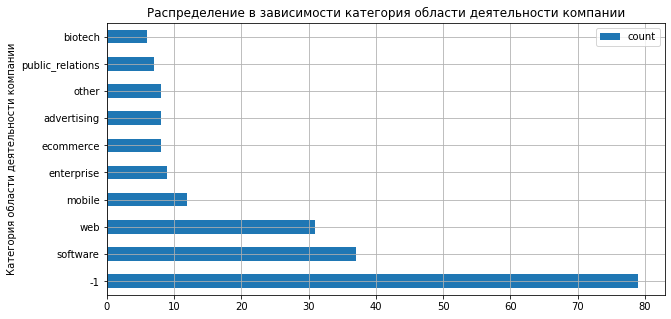

In [32]:
# Построим график столбчатой диаграммы
grouped = df_0.groupby('category_code').agg(count=('company_id', 'count')).sort_values(by='count',ascending=False).head(10).reset_index()#

grouped.plot(kind='barh',
             x='category_code',
             title=f'Распределение в зависимости категория области деятельности компании',
             legend=True,
             ylabel='Количество компаний',
             xlabel='Категория области деятельности компании',
             rot=0,
             figsize=(10, 5))
plt.grid()

# Выводим график
plt.show()

Рассчитаем верхнюю и нижнюю границу выбросов для столбца funding_total

In [33]:
# Вычисляем квартили Q1, Q3 и межквартильный диапазон IQR
Q1 = df['funding_total'].quantile(0.25)
Q3 = df['funding_total'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы выбросов
low_outlier_end = max(0, Q1 - 1.5 * IQR) # установил нижнюю границу выбросов равную 0
up_outlier_end = Q3 + 1.5 * IQR

print(f'Нижняя граница выбросов: {low_outlier_end}')
print(f'Верхняя граница выбросов: {up_outlier_end}')

Нижняя граница выбросов: 0
Верхняя граница выбросов: 14126625.0



### 3.4. Цены стартапов по категориям



,category_code,count_company,median_price,min_price,max_price,spread
0,-1,371,3800000.0,1.0,117000000.0,116999999.0
32,software,276,25000000.0,1858.0,112000000.0,111998142.0
35,web,168,20000000.0,5000.0,117500000.0,117495000.0
4,biotech,112,27950000.0,109000.0,115000000.0,114891000.0
20,mobile,79,26200000.0,5000.0,105000000.0,104995000.0
9,enterprise,69,22500000.0,20000.0,115000000.0,114980000.0
12,games_video,56,26300000.0,60.0,112000000.0,111999940.0
1,advertising,54,26350000.0,10000.0,105300000.0,105290000.0
24,other,46,21850000.0,1.0,105000000.0,104999999.0
13,hardware,44,20000000.0,49.0,100000000.0,99999951.0


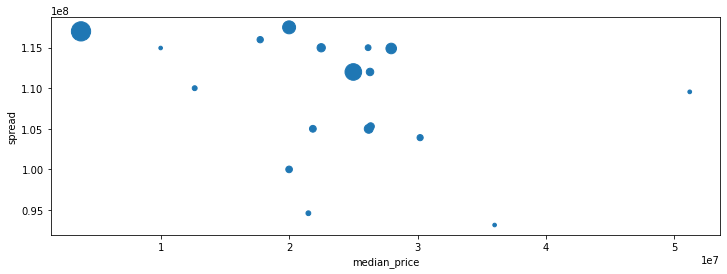

In [34]:
# Построим график столбчатой диаграммы
startap_df = df.merge(acquis_df, left_on='company_id', right_on='acquired_company_id', how='left')

# Для визуализации уберём экстемальные выбросы - 10% справа и price_amount = 0
Q3 = startap_df['price_amount'].quantile(0.9)
df_quantile = startap_df[(startap_df['price_amount'] < Q3) & (startap_df['price_amount'] > 0)]

# Группируем для расчёта 'median', 'min', 'max'
df_quantile_gr = df_quantile.groupby('category_code').agg(count_company = ('company_id', 'count'),
                                                          median_price = ('price_amount', 'median'),
                                                          min_price = ('price_amount', 'min'),
                                                          max_price = ('price_amount', 'max'))\
                                                      .reset_index().sort_values(by='count_company', ascending=False)                          

# Добавим колонку с Разбросом цен
df_quantile_gr['spread'] = df_quantile_gr['max_price'] - df_quantile_gr['min_price']

# Отбираем категории с кол-вом компаний более 10
df_quantile_gr = df_quantile_gr[df_quantile_gr.count_company >= 10]
display(df_quantile_gr)

# Строим график разброса scatter
df_quantile_gr.plot.scatter(x='median_price', 
                            y='spread', 
                            s='count_company',
                            figsize=(12, 4))
# Выводим график
plt.show()

При рассмотрении ТОП-10 категорий стартапов наиболее привлекательными являются mobile, health, social и biotech

In [35]:
# Проверим дубли
# df_0[df_0.acquired_company_id.duplicated()==True].sort_values(by='acquired_company_id')
# df_0[df_0.price_amount]
acquis_df.price_amount.median()
# acquis_df.info()

0.0


### 3.5. Сколько раундов продержится стартап перед покупкой



,status,funding_rounds
0,acquired,0.5
1,closed,1.4
2,operating,1.5
3,ipo,1.9


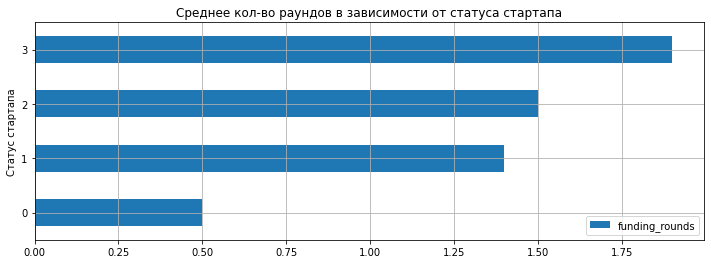

In [36]:
rounds_df = df.groupby('status')['funding_rounds'].mean().sort_values().round(1).reset_index()
display(rounds_df)

rounds_df.plot( kind='barh',
              title=f'Среднее кол-во раундов в зависимости от статуса стартапа',
              legend=True,
              ylabel='Сумма финансирования',
              xlabel='Статус стартапа',
              rot=0,
              figsize=(12, 4))
plt.grid()

# Выводим график
plt.show()

В среднем до 2 раундов финансирования проходило для стартапов в зависимости от группы. Самое большое значение 2 характерно для ipo (первичного публичного размещения акций)

In [39]:
fund_df

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,-1,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,-1,USA,0.0,0.0,0.0,4.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,-1,-1,0.0,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,-1,-1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217463,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
217467,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0
217468,174536.0,Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,-1,0.0,0.0,0.0,0.0
217469,43233.0,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.0,3.0,57500000.0,3.0


0 15
range(0, 16, 2)


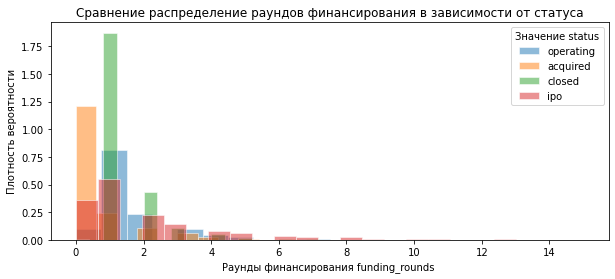

In [40]:
# Строим гистограмму распределения значений возраста
# Создаём фигуру графика
plt.figure(figsize=(10, 4))

# Находим минимальное и максимальное значения
min_value = df['funding_rounds'].astype('int').min()
max_value = df['funding_rounds'].astype('int').max()
print(min_value, max_value)
print(range(min_value, max_value+1, 2))
# Строим гистограммы для каждого значения churn
for i in df['status'].unique():
    # Фильтруем данные по значению столбца status
    df.loc[df['status'] == i, 'funding_rounds'].plot(
        kind='hist',
        density=True,
        bins=20, #range(min_value, max_value+1),
        alpha=0.5,
        edgecolor='w',
        label=f'{i}',
        legend=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределение раундов финансирования в зависимости от статуса')
plt.xlabel('Раунды финансирования funding_rounds ')
plt.ylabel('Плотность вероятности')
plt.legend(title='Значение status')

plt.show()


## Шаг 4. Итоговый вывод и рекомендации



Общий обзор проделанной работы.
В ходе исследования были проанализированы данные о инвестировании и финансировании стартапов. 
- Первичноый анализ полноты данных показывает, что данные невысокого качества — присутствует существенное количество свыще 50% пропущенных значений по части информациию. 76% пропущенных данных о фининсаровании и более 80% пропусков в данных связывающих информацию о сотрудниках с компаниями (company_id). Данных для корректного анализа не достаточно.
- датасет company_and_rounds.csv которы содержит избыточную информацию с больши количеством дублей был разделён на две таблицы, что уменьшает повышает размер облегчает работу и исключает дополнительные группировки
На основе полученных данных можно сделать следующие выводы:
- В 2005 году типичный размер собранных в рамках одного раунда средств был максимален
- В 2013 году наблюдается тенденуия к высокому значение количеству раундов с выделениеме в рамках каждого раунда незначительных средств
- Большое количество мелких стартапов, которые активно финансируется, что приводит к росту раундов, и росту суммарных инвестиций
- Распределение данных по сумме финансирования стартапов характеризуется широким разбросом и длинным «хвостом» в правой части гистограммы. Такие высокие значения можно отнести к выбросам 
- При рассмотрении ТОП-10 категорий стартапов наиболее привлекательными являются mobile, health, social и biotech
- В среднем до 2 раундов финансирования проходило для стартапов в зависимости от группы. Самое большое значение 2 характерно для ipo
Данные неполны, поэтому необходимо аккуратно относиться к получаемым в процессе исследования значениям показателей и выводам.





